# Procedure
1. Data import
2. Normarize & One-hot encording
3. Create Model
4. Deep Learning
5. Check history(Graph)
6. Evaluate

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Google DriveからColabにコピーして解凍するやり方
!cp "/content/drive/My Drive/04_Google Colaboratory/210821_モノクロ顔画像の感情分類/train.zip" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210821_モノクロ顔画像の感情分類/test.zip" .

In [3]:
!unzip "/content/train.zip"
!unzip "/content/test.zip"

Archive:  /content/train.zip
  inflating: train/train_0000.jpg    
  inflating: train/train_0001.jpg    
  inflating: train/train_0002.jpg    
  inflating: train/train_0003.jpg    
  inflating: train/train_0004.jpg    
  inflating: train/train_0005.jpg    
  inflating: train/train_0006.jpg    
  inflating: train/train_0007.jpg    
  inflating: train/train_0008.jpg    
  inflating: train/train_0009.jpg    
  inflating: train/train_0010.jpg    
  inflating: train/train_0011.jpg    
  inflating: train/train_0012.jpg    
  inflating: train/train_0013.jpg    
  inflating: train/train_0014.jpg    
  inflating: train/train_0015.jpg    
  inflating: train/train_0016.jpg    
  inflating: train/train_0017.jpg    
  inflating: train/train_0018.jpg    
  inflating: train/train_0019.jpg    
  inflating: train/train_0020.jpg    
  inflating: train/train_0021.jpg    
  inflating: train/train_0022.jpg    
  inflating: train/train_0023.jpg    
  inflating: train/train_0024.jpg    
  inflating: train/tr

In [4]:
!ls

drive  sample_data  test  test.zip  train  train.zip


In [5]:
import os
import cv2
import glob
from natsort import natsorted

In [6]:
os.chdir("/content/train")                #階層移動
path_train = natsorted(glob.glob("*"))   #階層内のPathを全取得
print(path_train)

['train_0000.jpg', 'train_0001.jpg', 'train_0002.jpg', 'train_0003.jpg', 'train_0004.jpg', 'train_0005.jpg', 'train_0006.jpg', 'train_0007.jpg', 'train_0008.jpg', 'train_0009.jpg', 'train_0010.jpg', 'train_0011.jpg', 'train_0012.jpg', 'train_0013.jpg', 'train_0014.jpg', 'train_0015.jpg', 'train_0016.jpg', 'train_0017.jpg', 'train_0018.jpg', 'train_0019.jpg', 'train_0020.jpg', 'train_0021.jpg', 'train_0022.jpg', 'train_0023.jpg', 'train_0024.jpg', 'train_0025.jpg', 'train_0026.jpg', 'train_0027.jpg', 'train_0028.jpg', 'train_0029.jpg', 'train_0030.jpg', 'train_0031.jpg', 'train_0032.jpg', 'train_0033.jpg', 'train_0034.jpg', 'train_0035.jpg', 'train_0036.jpg', 'train_0037.jpg', 'train_0038.jpg', 'train_0039.jpg', 'train_0040.jpg', 'train_0041.jpg', 'train_0042.jpg', 'train_0043.jpg', 'train_0044.jpg', 'train_0045.jpg', 'train_0046.jpg', 'train_0047.jpg', 'train_0048.jpg', 'train_0049.jpg', 'train_0050.jpg', 'train_0051.jpg', 'train_0052.jpg', 'train_0053.jpg', 'train_0054.jpg', 'train_00

In [7]:
train = []                   

for p in path_train:           
   pathEach = p
   imageTTTT = cv2.imread(pathEach,cv2.IMREAD_GRAYSCALE)
   train.append(imageTTTT)

In [8]:
os.chdir("/content/test")
path_test = natsorted(glob.glob("*"))
print(path_test)

['test_0000.jpg', 'test_0001.jpg', 'test_0002.jpg', 'test_0003.jpg', 'test_0004.jpg', 'test_0005.jpg', 'test_0006.jpg', 'test_0007.jpg', 'test_0008.jpg', 'test_0009.jpg', 'test_0010.jpg', 'test_0011.jpg', 'test_0012.jpg', 'test_0013.jpg', 'test_0014.jpg', 'test_0015.jpg', 'test_0016.jpg', 'test_0017.jpg', 'test_0018.jpg', 'test_0019.jpg', 'test_0020.jpg', 'test_0021.jpg', 'test_0022.jpg', 'test_0023.jpg', 'test_0024.jpg', 'test_0025.jpg', 'test_0026.jpg', 'test_0027.jpg', 'test_0028.jpg', 'test_0029.jpg', 'test_0030.jpg', 'test_0031.jpg', 'test_0032.jpg', 'test_0033.jpg', 'test_0034.jpg', 'test_0035.jpg', 'test_0036.jpg', 'test_0037.jpg', 'test_0038.jpg', 'test_0039.jpg', 'test_0040.jpg', 'test_0041.jpg', 'test_0042.jpg', 'test_0043.jpg', 'test_0044.jpg', 'test_0045.jpg', 'test_0046.jpg', 'test_0047.jpg', 'test_0048.jpg', 'test_0049.jpg', 'test_0050.jpg', 'test_0051.jpg', 'test_0052.jpg', 'test_0053.jpg', 'test_0054.jpg', 'test_0055.jpg', 'test_0056.jpg', 'test_0057.jpg', 'test_0058.jp

In [9]:
test = []                   

for p in path_test:     
   pathEach = p
   imageTTTT = cv2.imread(pathEach,cv2.IMREAD_GRAYSCALE)
   test.append(imageTTTT)

In [10]:
print("train shape", train[0].shape)
print("train data", len(train))
print("test data", len(test))

train shape (120, 128)
train data 312
test data 312


In [66]:
os.chdir("/content")
!cp "/content/drive/My Drive/04_Google Colaboratory/210821_モノクロ顔画像の感情分類/train_master.tsv" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210821_モノクロ顔画像の感情分類/sample_submit.csv" .

In [74]:
import pandas as pd

train_master = pd.read_csv("/content/train_master.tsv", sep='\t')

In [75]:
train_master.head(10)

,id,userid,pose,expression,eyes
0,train_0000.jpg,choon,straight,angry,open
1,train_0001.jpg,kk49,straight,angry,open
2,train_0002.jpg,phoebe,right,sad,sunglasses
3,train_0003.jpg,kawamura,left,neutral,sunglasses
4,train_0004.jpg,an2i,left,happy,sunglasses
5,train_0005.jpg,megak,straight,neutral,open
6,train_0006.jpg,phoebe,left,happy,open
7,train_0007.jpg,saavik,straight,happy,sunglasses
8,train_0008.jpg,at33,straight,neutral,sunglasses
9,train_0009.jpg,an2i,up,happy,sunglasses


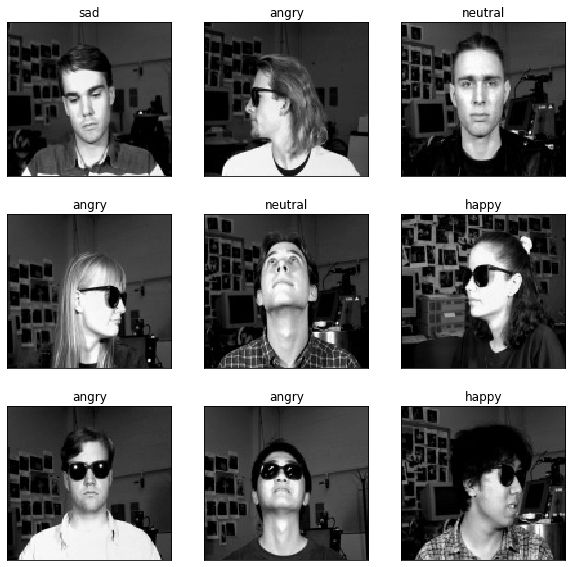

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n_image = 9
rand_id = np.random.randint(0, len(train), n_image)


plt.figure(figsize=(10,10))

for i in range(n_image):
  plt.subplot(3,3, i+1)
  plt.imshow(train[rand_id[i]].reshape(120,128),cmap='gray', interpolation='none')
  label = train_master["expression"][rand_id[i]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) 



In [15]:
print(type(train))

<class 'list'>


In [16]:
train = np.array(train)
test = np.array(test)


train = train.reshape((train.shape[0], 120, 128, 1))
test = test.reshape((test.shape[0], 120, 128, 1))

train = train.astype('float32')      
test = test.astype('float32')

print(train.shape)
print(test.shape)

(312, 120, 128, 1)
(312, 120, 128, 1)


In [76]:
x = train
#t = train_master["expression"]
t = train_master["expression"].replace(["sad", "angry", "neutral", "happy"], [0, 1, 2, 3])

In [77]:
t.tail()

307    2
308    2
309    2
310    3
311    1
Name: expression, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [79]:
from keras.utils import np_utils

t_train = np_utils.to_categorical(t_train)
t_test = np_utils.to_categorical(t_test)
print(t_train[:10])

x_train = x_train / 255
x_test = x_test / 255

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [83]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

n_class = 4

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5)) 
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 120, 128, 32)      320       
_________________________________________________________________
activation_6 (Activation)    (None, 120, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 118, 126, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 118, 126, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 59, 63, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 59, 63, 64)       

In [84]:
history = model.fit(x_train, t_train, epochs=20, batch_size=50, validation_data=(x_test, t_test))

Epoch 1/20
5/5 [==============================] - 18s 3s/step - loss: 1.4475 - accuracy: 0.2479 - val_loss: 1.3824 - val_accuracy: 0.3205
Epoch 2/20
5/5 [==============================] - 17s 3s/step - loss: 1.3844 - accuracy: 0.2863 - val_loss: 1.3939 - val_accuracy: 0.2436
Epoch 3/20
5/5 [==============================] - 17s 3s/step - loss: 1.3837 - accuracy: 0.2735 - val_loss: 1.3971 - val_accuracy: 0.1923
Epoch 4/20
5/5 [==============================] - 17s 3s/step - loss: 1.3736 - accuracy: 0.3547 - val_loss: 1.3956 - val_accuracy: 0.1667
Epoch 5/20
5/5 [==============================] - 16s 3s/step - loss: 1.3605 - accuracy: 0.3504 - val_loss: 1.4119 - val_accuracy: 0.2308
Epoch 6/20
5/5 [==============================] - 17s 3s/step - loss: 1.3588 - accuracy: 0.3205 - val_loss: 1.4368 - val_accuracy: 0.2179
Epoch 7/20
5/5 [==============================] - 17s 3s/step - loss: 1.3125 - accuracy: 0.3889 - val_loss: 1.4457 - val_accuracy: 0.1538
Epoch 8/20
5/5 [==================

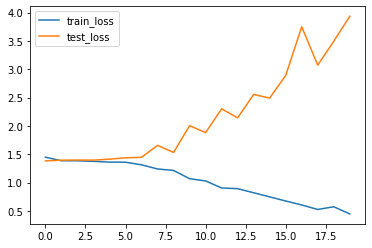

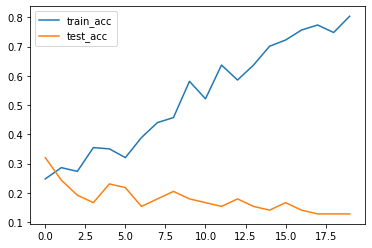

In [85]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.plot(np.arange(len(train_loss)), train_loss, label="train_loss")
plt.plot(np.arange(len(test_loss)), test_loss, label="test_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label="train_acc")
plt.plot(np.arange(len(train_acc)), test_acc, label="test_acc")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

469/469 [==============================] - 2s 3ms/step - loss: 0.0348 - accuracy: 0.9927
0.03480793163180351 0.992733359336853


# 特徴量検討

In [122]:
#tr_mstr = pd.get_dummies(train_master[train_master["userid", "pose", "expression", "eyes"]])
train_master = pd.DataFrame(train_master)
tr_mstr = train_master[[2,3,4]]
tr_mstr = pd.get_dummies(tr_mstr)
tr_mstr.corr()

,2_left,2_right,2_straight,2_up,3_angry,3_happy,3_neutral,3_sad,4_open,4_sunglasses
2_left,1.000000,-0.308170,-0.319182,-0.349498,0.008701,0.061095,-0.022071,-0.045802,-0.015848,0.015848
2_right,-0.308170,1.000000,-0.316354,-0.346402,0.030597,-0.041188,-0.070520,0.078472,0.006602,-0.006602
2_straight,-0.319182,-0.316354,1.000000,-0.358780,-0.021460,-0.022071,0.051672,-0.008142,-0.037373,0.037373
2_up,-0.349498,-0.346402,-0.358780,1.000000,-0.016449,0.002147,0.037699,-0.022732,0.044576,-0.044576
3_angry,0.008701,0.030597,-0.021460,-0.016449,1.000000,-0.321934,-0.330484,-0.347585,0.044426,-0.044426
3_happy,0.061095,-0.041188,-0.022071,0.002147,-0.321934,1.000000,-0.319182,-0.335698,-0.061075,0.061075
3_neutral,-0.022071,-0.070520,0.051672,0.037699,-0.330484,-0.319182,1.000000,-0.344614,0.007246,-0.007246
3_sad,-0.045802,0.078472,-0.008142,-0.022732,-0.347585,-0.335698,-0.344614,1.000000,0.008186,-0.008186
4_open,-0.015848,0.006602,-0.037373,0.044576,0.044426,-0.061075,0.007246,0.008186,1.000000,-1.000000
4_sunglasses,0.015848,-0.006602,0.037373,-0.044576,-0.044426,0.061075,-0.007246,-0.008186,-1.000000,1.000000


# Pend...

In [163]:
sample_submit = pd.read_csv("/content/sample_submit.csv", header=None)

In [164]:
sample_submit.head()

,0,1
0,test_0000.jpg,angry
1,test_0001.jpg,angry
2,test_0002.jpg,sad
3,test_0003.jpg,sad
4,test_0004.jpg,sad


In [143]:
pred = model.predict(test)
pred_cat = np.argmax(pred, axis=1)
pred_cat =pd.DataFrame(pred_cat)
pred_cat = pred_cat.replace([0, 1, 2, 3], ["sad", "angry", "neutral", "happy"])

In [156]:
pred_cat

,0
0,angry
1,sad
2,angry
3,sad
4,sad
...,...
307,happy
308,neutral
309,angry
310,angry


In [165]:
sample_submit[1] = pred_cat 

In [166]:
sample_submit

,0,1
0,test_0000.jpg,angry
1,test_0001.jpg,sad
2,test_0002.jpg,angry
3,test_0003.jpg,sad
4,test_0004.jpg,sad
...,...,...
307,test_0307.jpg,happy
308,test_0308.jpg,neutral
309,test_0309.jpg,angry
310,test_0310.jpg,angry


In [167]:
os.chdir("/content")

In [168]:
sample_submit.to_csv("submit01.csv", index=None,header=None)